In [215]:
import pandas as pd
import numpy as np
import pricey as pr
from prophet import Prophet
import FinanceDataReader as fdr
from sklearn.decomposition import PCA, KernelPCA, FastICA
from tqdm.notebook import tqdm
import statsmodels.api as sm
import itertools
from IPython.core.debugger import set_trace

from sklearnex import patch_sklearn
patch_sklearn()

# import warnings
# warnings.filterwarnings(action='ignore')

import logging
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger("cmdstanpy").disabled=True

from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, Imputer
from sklearn.cluster import KMeans

%matplotlib inline

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# import matplotlib.pyplot as plt
 
# # 한글 폰트 사용을 위해서 세팅
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

In [2]:
univ = pd.read_excel('ticker_map.xlsx', converters={'code':str})
univ = list(univ['code']); univ

['005930',
 '005935',
 '000660',
 '006400',
 '006405',
 '051910',
 '051915',
 '005380',
 '005385',
 '035420',
 '068270',
 '000270',
 '035720',
 '105560',
 '005490',
 '055550',
 '207940',
 '012330',
 '373220',
 '028260',
 '086790',
 '033780',
 '066570',
 '066575',
 '096770',
 '316140',
 '017670',
 '034730',
 '003550',
 '030200',
 '009150',
 '259960',
 '036570',
 '323410',
 '000810',
 '009830',
 '015760',
 '032830',
 '051900',
 '010130',
 '011200',
 '003490',
 '034020',
 '003670',
 '011070',
 '018260',
 '402340',
 '028050',
 '009540',
 '010950',
 '010140',
 '352820',
 '047810',
 '097950',
 '090430',
 '034220',
 '021240',
 '000100',
 '035250',
 '086280',
 '032640',
 '251270',
 '000720',
 '011170',
 '267250',
 '004020',
 '024110',
 '161390',
 '377300',
 '010620',
 '005830',
 '011780',
 '008770',
 '383220',
 '271560',
 '006800',
 '329180',
 '071050',
 '012450',
 '018880',
 '078930',
 '016360',
 '011790',
 '001450',
 '139480',
 '010060',
 '128940',
 '138930',
 '004170',
 '030000',
 '302440',

In [3]:
_dflist = [fdr.DataReader(code, '2019-01-01', '2023-03-31')['Close'] for code in tqdm(univ)]

  0%|          | 0/147 [00:00<?, ?it/s]

In [4]:
p = pd.concat(_dflist, axis=1)
p.columns = univ
p.head()

,005930,005935,000660,006400,006405,051910,051915,005380,005385,035420,...,006650,192820,003850,105630,069500,232080,261220,132030,261240,148070
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,38750,31600,60600,210500,85800,337000,191500,114000,68600,118000,...,147500,122530,7557,19700,24086,11330,16065,9400,9610,115112
2019-01-03,37600,30800,57700,203000,83000,328000,186500,116500,69800,122000,...,139500,121059,7399,18950,23852,11068,16280,9440,9690,115150
2019-01-04,37450,30450,58300,201000,81200,330500,184000,119500,70400,125500,...,136000,123510,7452,19550,24034,11275,16925,9460,9665,114875
2019-01-07,38750,32100,58700,217000,85600,343000,190000,120500,70200,131500,...,148000,125470,7557,20650,24375,11358,17410,9425,9605,114922
2019-01-08,38100,30900,59200,218500,86100,349500,193500,119500,69900,130000,...,144000,125470,7511,21750,24220,11221,17330,9380,9645,114780


In [5]:
logp = np.log(p)

In [16]:
pd.DataFrame(comp)

,0,1,2,3
0,11.649960,2.790682,-5.592652,0.198910
1,12.523663,2.767756,-4.437882,-0.099419
2,12.597491,2.306064,-4.138979,0.214811
3,13.845528,2.338761,-3.001710,-0.384622
4,13.271297,1.836281,-3.035770,0.268476
...,...,...,...,...
245,-5.295034,8.079508,-1.783809,-4.441496
246,-4.478416,8.398910,-1.375022,-5.129917
247,-4.993927,8.560056,-1.510729,-4.902660
248,-5.774845,8.623370,-2.650149,-4.529652


In [17]:
pd.DataFrame(scaler.transform(_logp) @ reducer.components_.T)

,0,1,2,3
0,11.649960,2.790682,-5.592652,0.198910
1,12.523663,2.767756,-4.437882,-0.099419
2,12.597491,2.306064,-4.138979,0.214811
3,13.845528,2.338761,-3.001710,-0.384622
4,13.271297,1.836281,-3.035770,0.268476
...,...,...,...,...
265,-7.786894,8.298472,-4.933611,-5.345939
266,-8.043248,7.765443,-5.754570,-5.155363
267,-8.287728,7.658309,-5.512787,-5.098666
268,-7.097278,7.925156,-4.403312,-5.478012


In [410]:
class Basket:
    def __init__(self, *assets, univ=None, hedger=None, logp=None, logp_model=None, nback=None):
        self.assets = list(assets)
        self.univ = univ
        self.hedger = hedger
        self.logp = logp
        self.logp_model = logp_model
        self.nback = nback
        
        self.w = self.get_w()
        self.sp, self.sp_model = self.get_spreads()
        self.halflife = self.get_halflife()
        

    def get_w(self):
        n = len(self.assets)
        b = self.hedger[:, :n-1][self.univ.index(self.assets[0])]
        B = self.hedger[:, :n-1][[self.univ.index(asset) for asset in self.assets[1:]]]
        w = -b @ np.linalg.inv(B)
        w = np.insert(w, 0, 1)

        wp = w[w>0].sum()
        wm = -w[w<0].sum()
        
        return w / max(wp, wm)

    
    def get_spreads(self):
        r = self.logp[self.assets].diff().fillna(0) @ self.w
        sp = r.cumsum()

        r_model = self.logp_model[self.assets].diff().fillna(0) @ self.w
        sp_model = r_model.cumsum()
        sp_model -= (sp_model[:self.nback] - sp[:self.nback]).mean()
        # print(sp_model)

        # return (sp - sp.mean()) / sp.std(), (sp_model - sp.mean()) / sp.std()
        return (sp - sp[:self.nback].mean()) / sp[:self.nback].std(), (sp_model - sp[:self.nback].mean()) / sp[:self.nback].std()
    

    def get_halflife(self):
        _lag = np.roll(self.sp[:self.nback], 1)
        _lag[0] = 0
        _ret = self.sp[:self.nback] - _lag
        _ret[0] = 0

        _lag2 = sm.add_constant(_lag)

        _model = sm.OLS(_ret, _lag2)
        res = _model.fit()

        return -np.log(2) / res.params[1]
    
        
        
class BasketBuilder:
    def __init__(self, logp, nback, nfwd):
        self.nback = nback
        self.nfwd = nfwd
        self.logp = logp
        self.logp_asof = logp[:nback]#; set_trace()
        
        self.univ = list(logp.columns)
        self.dates = logp.index
        
        self.scaler = StandardScaler()
        self.logp_scaled = self.scaler.fit_transform(self.logp_asof)
        #self.reducer = PCA(n_components=0.80, random_state=0)
        self.reducer = FastICA(n_components=4, random_state=0)
        self.comp = self.reducer.fit_transform(self.logp_scaled)
        self.comp_std = self.comp.std(axis=0)

        #self.comp_extend = self.scaler.transform(logp) @ self.reducer.components_.T
        self.comp_extend = self.get_comp_projected()
        
        self.logp_model = self.get_logp_model()
        self.hedger = self.reducer.components_.T * self.comp_std * self.logp_asof.std().values.reshape(-1,1)
        
        self.n_assets = self.comp.shape[1] + 1
        self.assets_comb =  list(itertools.combinations(self.univ[:20], self.n_assets))
        self.baskets = [] #self.get_baskets()

        
    def get_logp_model(self):
        _logp_model = self.scaler.inverse_transform(self.reducer.inverse_transform(self.comp_extend))
        return pd.DataFrame(_logp_model, index=self.dates, columns=self.univ)
    
    def get_comp_projected(self):
        df = pd.DataFrame(self.comp, index=self.logp_asof.index)
        icomps = list(df.columns)
        df = pd.melt(df.reset_index(), id_vars='Date', value_vars=icomps)
        df.columns = ['ds', 'c', 'y']

        projected = []

        for _, group in df.groupby('c'):
            m = Prophet(weekly_seasonality=False, yearly_seasonality=False, 
                        daily_seasonality=False, changepoint_prior_scale=0.2)

            m.fit(group)
            future = m.make_future_dataframe(periods=self.nfwd)
            forecast = m.predict(future)
            projected.append(forecast.yhat[-self.nfwd:].values)

        return pd.DataFrame(np.concatenate([self.comp, np.array(projected).T]))
    
    
    def get_baskets(self):
        for _assets in tqdm(self.assets_comb):
            bk = Basket(*_assets, 
                        univ=self.univ, hedger=self.hedger, 
                        logp=self.logp, logp_model=self.logp_model, nback=self.nback)
            self.baskets.append(bk)

        return self.baskets
    
    
    def get_basket(self, *assets):
        return Basket(*assets, 
                      univ=self.univ, hedger=self.hedger, 
                      logp=self.logp, logp_model=self.logp_model, nback=self.nback)

In [411]:
asof = '2021-12-31'
nback = 250
nfwd = 250

i_asof = logp.index.get_loc(logp.index.asof(asof))
_logp = logp.iloc[i_asof-nback+1:i_asof+nfwd+1].dropna(axis='columns')

builder = BasketBuilder(_logp, nback, nfwd)
bsk = builder.get_basket('005930', '005935', '035720', '028260', '006400', '055550')

pd.DataFrame({'sp':bsk.sp[:nback], 'spfwd':bsk.sp[nback-1:], 'model':bsk.sp_model}).plot()

LinAlgError: Last 2 dimensions of the array must be square

<AxesSubplot:>

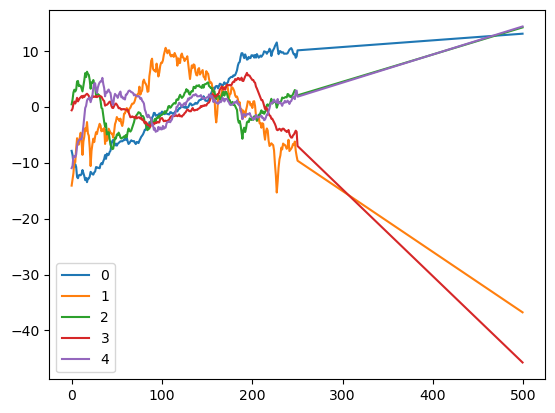

In [409]:
builder.comp_extend.plot()

<AxesSubplot:>

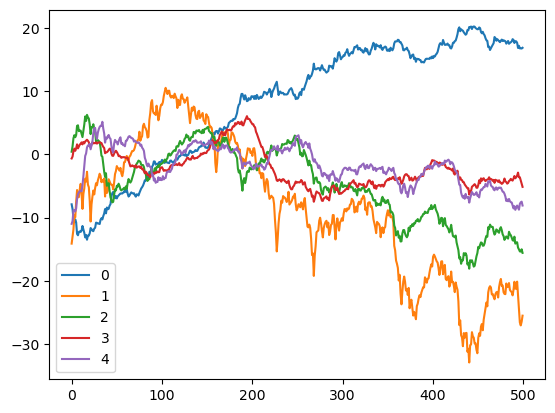

In [406]:
pd.DataFrame(builder.comp_extend).plot()

<AxesSubplot:xlabel='Date'>

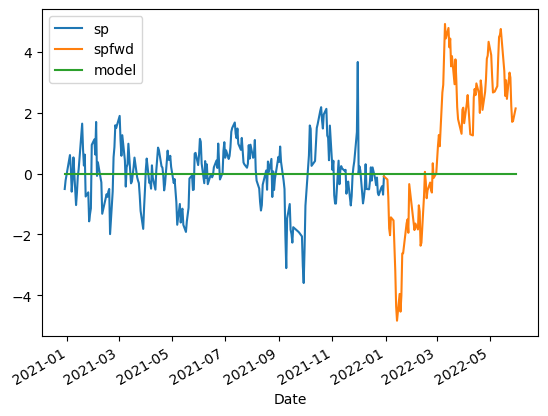

In [397]:
asof = '2021-12-31'
nback = 250
nfwd = 100

i_asof = logp.index.get_loc(logp.index.asof(asof))
_logp = logp.iloc[i_asof-nback+1:i_asof+nfwd+1].dropna(axis='columns')

builder = BasketBuilder(_logp, nback, nfwd)
bsk = builder.get_basket('005930', '005935', '035720', '028260', '006400', '055550')

pd.DataFrame({'sp':bsk.sp[:nback], 'spfwd':bsk.sp[nback-1:], 'model':bsk.sp_model}).plot()

<AxesSubplot:xlabel='Date'>

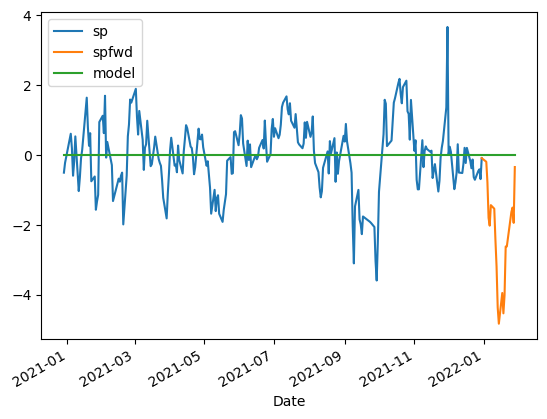

In [398]:
asof = '2021-12-31'
nback = 250
nfwd = 20

i_asof = logp.index.get_loc(logp.index.asof(asof))
_logp = logp.iloc[i_asof-nback+1:i_asof+nfwd+1].dropna(axis='columns')

builder = BasketBuilder(_logp, nback, nfwd)
bsk = builder.get_basket('005930', '005935', '035720', '028260', '006400', '055550')

pd.DataFrame({'sp':bsk.sp[:nback], 'spfwd':bsk.sp[nback-1:], 'model':bsk.sp_model}).plot()

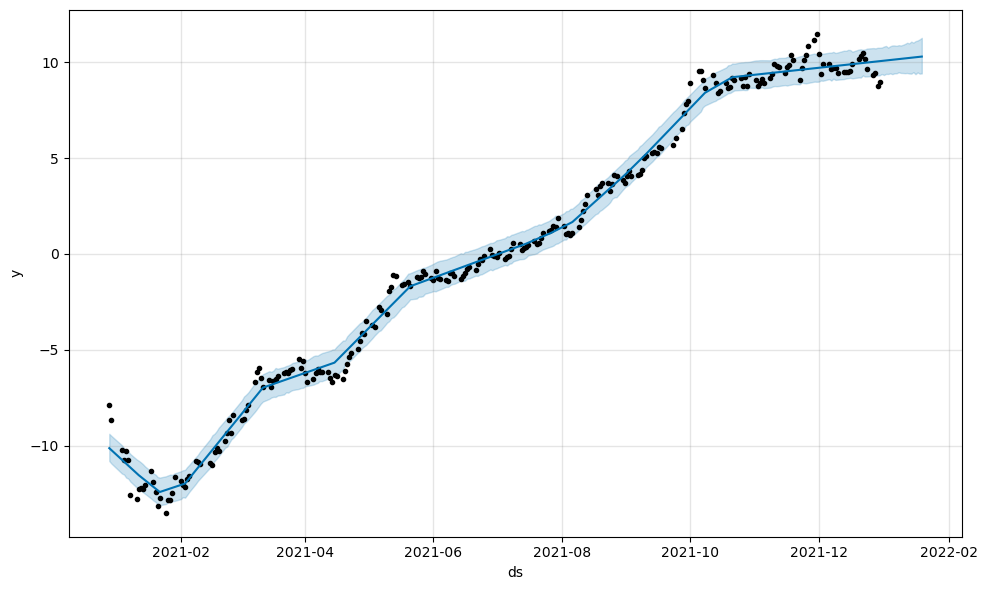

In [335]:
m.plot(forecast);